### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# splitting the data
from sklearn.model_selection import train_test_split

# model building
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

### Importing the data

In [2]:
for dir_name, dir_path, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dir_name, filename))

In [3]:
# import data
path = '/content/Customertravel.csv'
df = pd.read_csv(path)

In [4]:
# view the imported dataframe
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [5]:
# check for null values
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


### Data Visualization

In [8]:
def plot(data, x, y):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    sns.countplot(data=data, x=x, ax=axes[0])
    sns.countplot(data=data, x=x, hue=y, ax=axes[1])

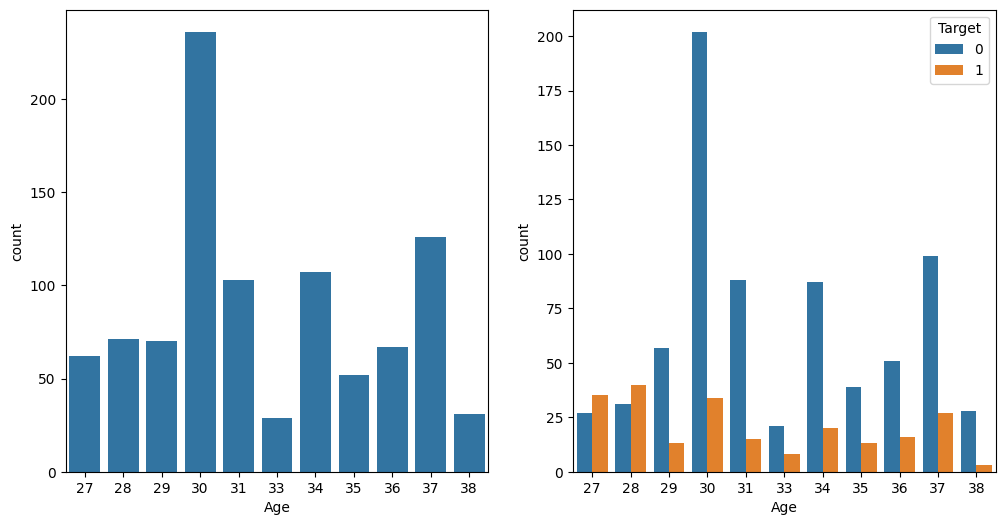

In [9]:
# distribution of age feature
plot(data=df, x='Age', y='Target')

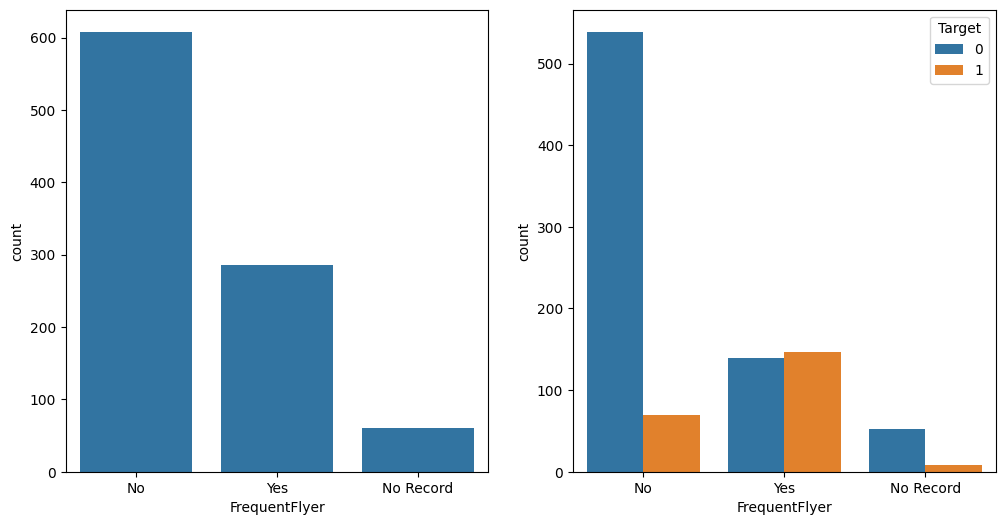

In [10]:
# distribution of frequent flyer feature
plot(data=df, x='FrequentFlyer', y='Target')

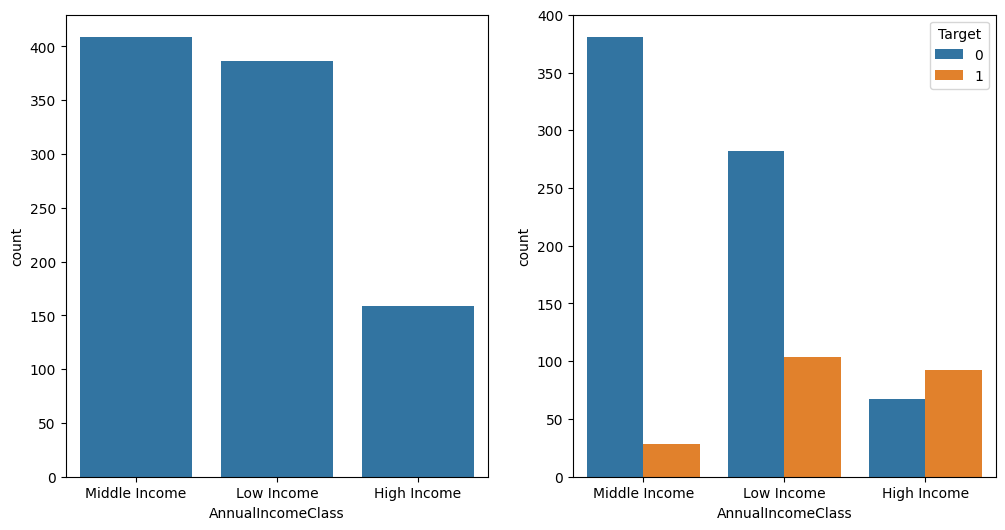

In [11]:
# distribution of annual income class  feature
plot(data=df, x='AnnualIncomeClass', y='Target')

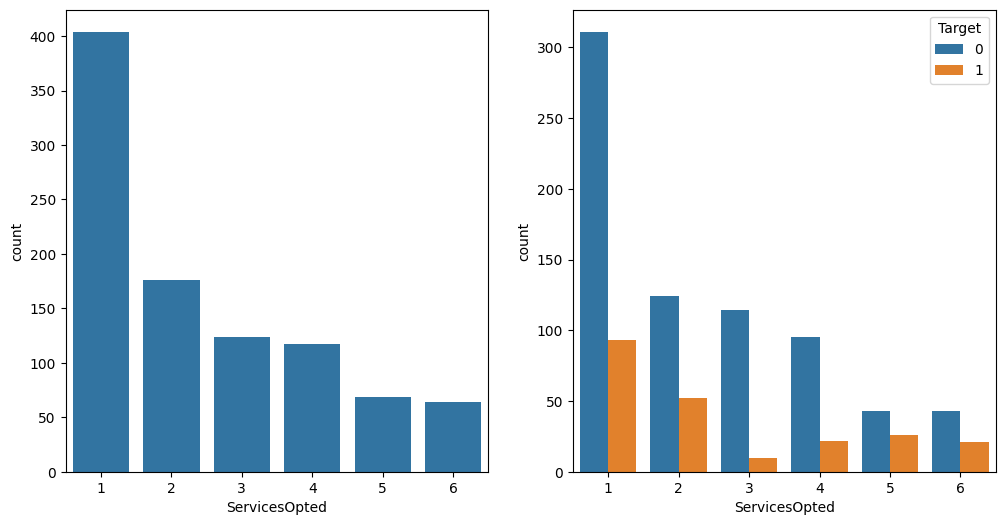

In [12]:
# distribution of number of times services opted feature
plot(data=df, x='ServicesOpted', y='Target')

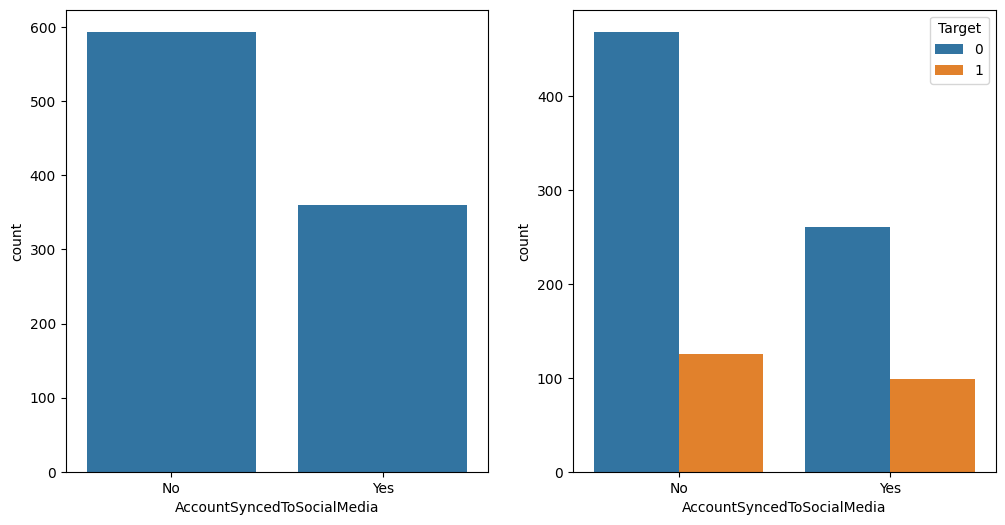

In [13]:
# distribution of account synced to social media feature
plot(data=df, x='AccountSyncedToSocialMedia', y='Target')

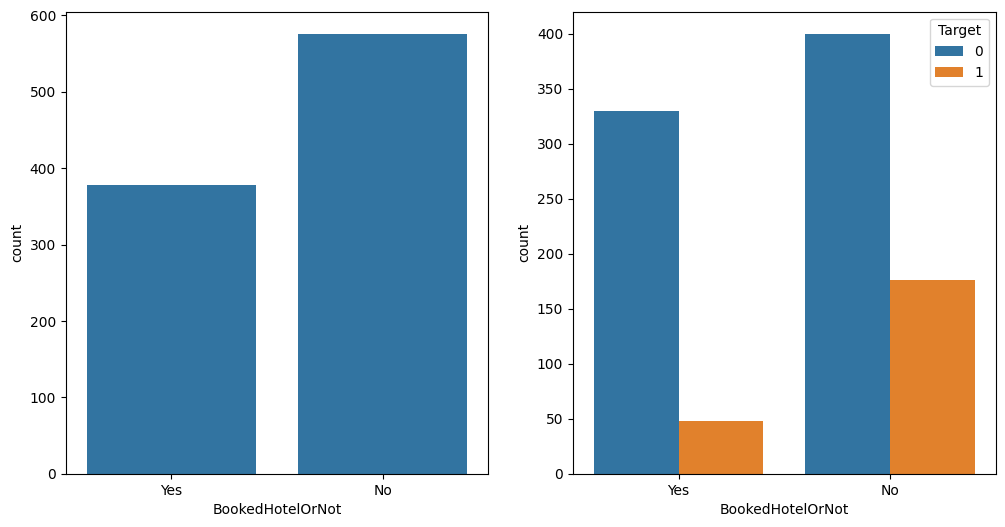

In [14]:
# distribution of booked hotel or not feature
plot(data=df, x='BookedHotelOrNot', y='Target')

### Date Pre-Processing

In [15]:
# make a copy of dataframe for encoding
df_encoded = df.copy()
df_encoded.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [16]:
# check the data types
df_encoded.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object

In [17]:
# converting into categorical variable
df_encoded['FrequentFlyer'] = df_encoded['FrequentFlyer'].astype('category')
df_encoded['AnnualIncomeClass'] = df_encoded['AnnualIncomeClass'].astype('category')
df_encoded['AccountSyncedToSocialMedia'] = df_encoded['AccountSyncedToSocialMedia'].astype('category')
df_encoded['BookedHotelOrNot'] = df_encoded['BookedHotelOrNot'].astype('category')
df_encoded.dtypes

Age                              int64
FrequentFlyer                 category
AnnualIncomeClass             category
ServicesOpted                    int64
AccountSyncedToSocialMedia    category
BookedHotelOrNot              category
Target                           int64
dtype: object

In [18]:
# encoding the categorical data
df_encoded['FrequentFlyer'] = df_encoded['FrequentFlyer'].cat.codes
df_encoded['AnnualIncomeClass'] = df_encoded['AnnualIncomeClass'].cat.codes
df_encoded['AccountSyncedToSocialMedia'] = df_encoded['AccountSyncedToSocialMedia'].cat.codes
df_encoded['BookedHotelOrNot'] = df_encoded['BookedHotelOrNot'].cat.codes
df_encoded.dtypes

Age                           int64
FrequentFlyer                  int8
AnnualIncomeClass              int8
ServicesOpted                 int64
AccountSyncedToSocialMedia     int8
BookedHotelOrNot               int8
Target                        int64
dtype: object

### Splitting the data

In [19]:
# splitting into feature and label
X = df_encoded.drop('Target',axis=1)
y = df_encoded['Target']

In [20]:
# viewing the data
X.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
0,34,0,2,6,0,1
1,34,2,1,5,1,0
2,37,0,2,3,1,0
3,30,0,2,2,0,0
4,30,0,1,1,0,0


In [21]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Target, dtype: int64

In [25]:
# splitting into train and test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((763, 6), (191, 6), (763,), (191,))

### Model Building

In [22]:
# build the model
model_0 = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)                6

In [26]:
# compile the model
model_0.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics= ['accuracy'])

In [28]:
# fit the model
history = model_0.fit(x_train, y_train, epochs=250)

Epoch 1/250
24/24 [==============================] - 1s 40ms/step - loss: 0.2124 - accuracy: 0.8925
Epoch 2/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9043
Epoch 3/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.8912
Epoch 4/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.8820
Epoch 5/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2293 - accuracy: 0.8768
Epoch 6/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.8925
Epoch 7/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.8912
Epoch 8/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.8899
Epoch 9/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.8820
Epoch 10/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.8952
Epoch 11

### Visualize the Performance

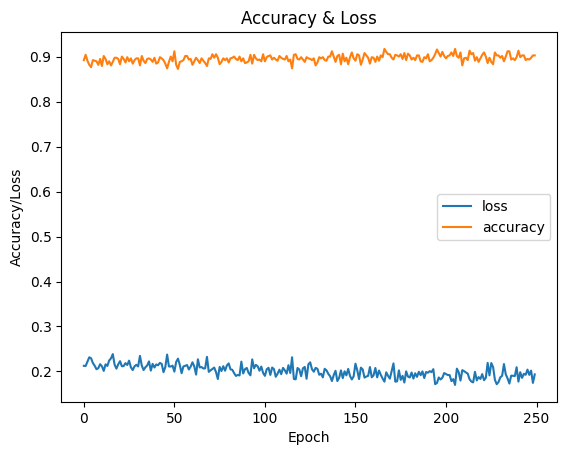

In [29]:
# plotting loss and accuracy curve
pd.DataFrame(history.history).plot();
plt.title('Accuracy & Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()

### Evaluate on test data

In [30]:
model_0.evaluate(x_test, y_test)

6/6 [==============================] - 1s 162ms/step - loss: 0.2369 - accuracy: 0.8796


[0.2369161695241928, 0.8795811533927917]